# **ASSOCIATION RULES – COMPLETE EXPLANATION**

**Objective**

To perform Market Basket Analysis using Association Rule Mining on the Online Retail Dataset and extract meaningful insights using Apriori algorithm.

# **Dataset**

You must use the Online Retail Dataset (commonly the UCI Online Retail Dataset).



*  InvoiceNo

*   StockCode

*  Description

*   Quantity
*   InvoiceDate

*  UnitPrice


*  CustomerID


*  Country



# **DATA PREPROCESSING STEPS**

**1. Import necessary libraries**

In [7]:
!pip install pandas openpyxl mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

**2. Load dataset**

In [2]:
df = pd.read_excel("/content/Online retail.xlsx")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

**3. Handle missing values**

In [4]:
display(df.head())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [11]:
# Display the first few rows of the dataset
data.head()

# Handle missing values by dropping rows with missing values
data.dropna(inplace=True)

In [13]:
data['Items'] = data.iloc[:, 0].str.split(',')

basket = data['Items'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index()
basket.columns = ['Transaction', 'Item']

basket['Item'] = basket['Item'].str.strip()
basket_sets = basket.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
basket_sets = basket_sets.applymap(lambda x: 1 if x > 0 else 0)

basket_sets.head()



Item,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

frequent_itemsets.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)


In [15]:
# Extract the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]

rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
345,"(ground beef, eggs)",(mineral water),0.020,0.238267,0.010133,0.506667,2.126469,1.0,0.005368,1.544054,0.540548,0.040838,0.352354,0.274598
380,"(ground beef, milk)",(mineral water),0.022,0.238267,0.011067,0.503030,2.111207,1.0,0.005825,1.532756,0.538177,0.044409,0.347580,0.274738


In [16]:
# Sort rules by lift and display the top 10
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
print(top_lift_rules)


             antecedents      consequents  antecedent support  \
345  (ground beef, eggs)  (mineral water)               0.020   
380  (ground beef, milk)  (mineral water)               0.022   

     consequent support   support  confidence      lift  representativity  \
345            0.238267  0.010133    0.506667  2.126469               1.0   
380            0.238267  0.011067    0.503030  2.111207               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
345  0.005368    1.544054       0.540548  0.040838   0.352354    0.274598  
380  0.005825    1.532756       0.538177  0.044409   0.347580    0.274738  


In [17]:
# Sort rules by lift and display the top 10
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
print(top_lift_rules)


             antecedents      consequents  antecedent support  \
345  (ground beef, eggs)  (mineral water)               0.020   
380  (ground beef, milk)  (mineral water)               0.022   

     consequent support   support  confidence      lift  representativity  \
345            0.238267  0.010133    0.506667  2.126469               1.0   
380            0.238267  0.011067    0.503030  2.111207               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
345  0.005368    1.544054       0.540548  0.040838   0.352354    0.274598  
380  0.005825    1.532756       0.538177  0.044409   0.347580    0.274738  


First few rows after splitting items:
  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  \
0                             burgers,meatballs,eggs                                                                                                                                                                                
1                                            chutney                                                                                                                                                                                
2                                     turkey,avocado                                                                                                                                                                                
3  mineral water,milk,energy bar,whole wheat r

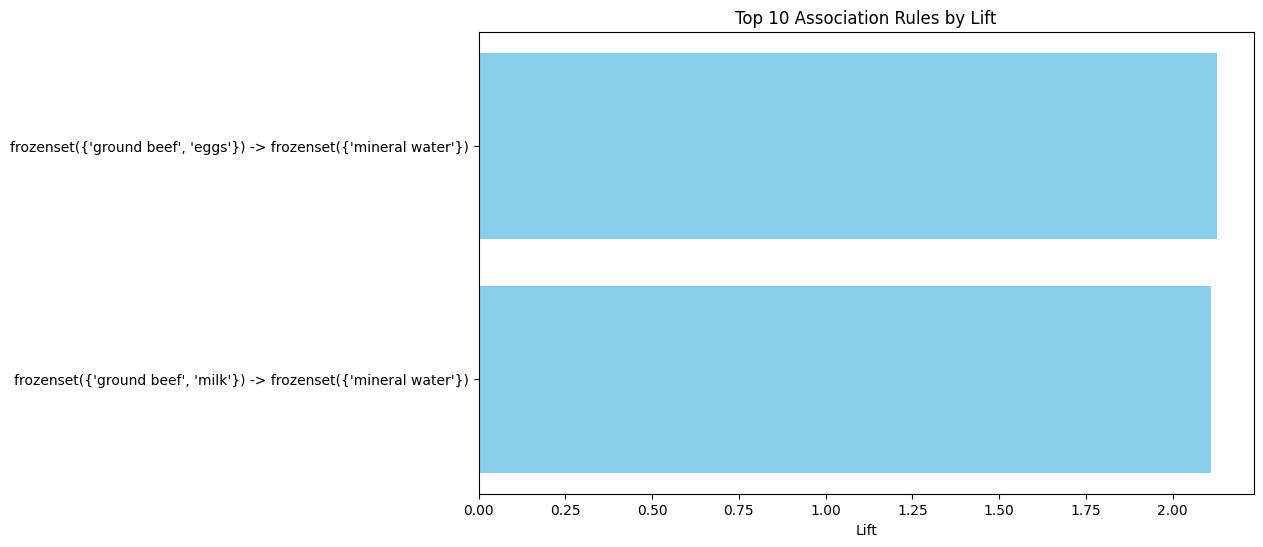

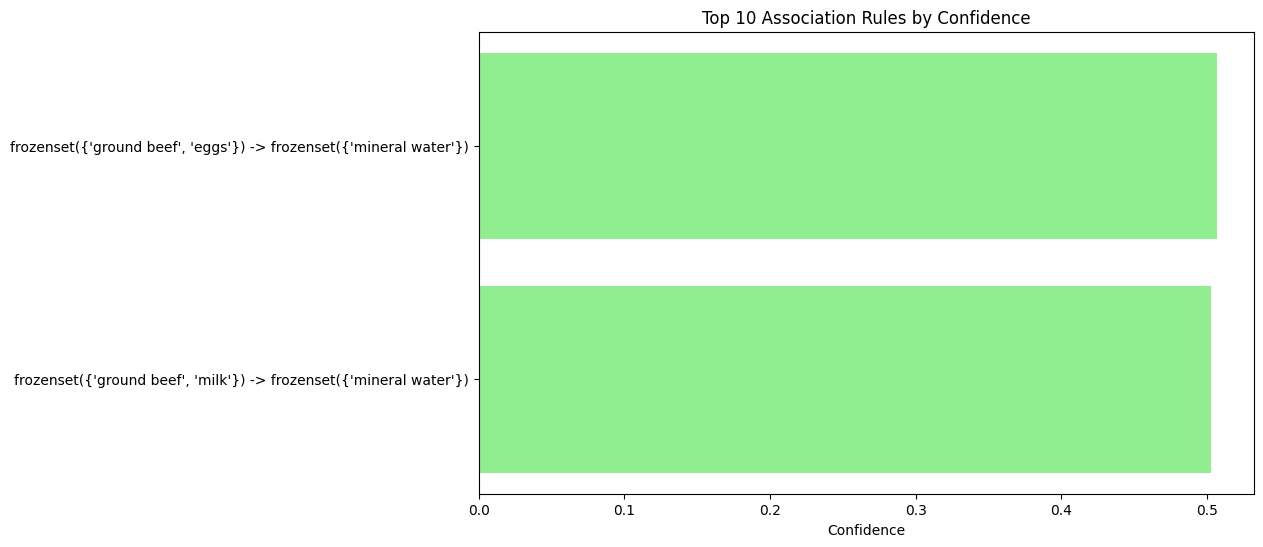

In [18]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


# Assuming the dataset is a list of transactions in a single column
# Split the transactions into individual items
data['Items'] = data.iloc[:, 0].str.split(',')

# Display the first few rows after splitting items
print("First few rows after splitting items:")
print(data.head())

# Create a DataFrame with each transaction as a separate row and items as columns
basket = data['Items'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index()
basket.columns = ['Transaction', 'Item']

# Display the first few rows of the basket
print("First few rows of the basket:")
print(basket.head())

# One-hot encode the items
basket['Item'] = basket['Item'].str.strip()
basket_sets = basket.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
basket_sets = basket_sets.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the one-hot encoded data
print("First few rows of the one-hot encoded data:")
print(basket_sets.head())

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print("Frequent itemsets:")
print(frequent_itemsets.head())

# Extract the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Set thresholds for support, confidence, and lift
rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]

# Display the rules
print("Association rules:")
print(rules.head())

# Visualize the Top 10 Rules by Lift
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_lift_rules)), top_lift_rules['lift'], color='skyblue')
plt.yticks(range(len(top_lift_rules)), [str(a) + ' -> ' + str(c) for a, c in zip(top_lift_rules['antecedents'], top_lift_rules['consequents'])])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

# Visualize the Top 10 Rules by Confidence
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_confidence_rules)), top_confidence_rules['confidence'], color='lightgreen')
plt.yticks(range(len(top_confidence_rules)), [str(a) + ' -> ' + str(c) for a, c in zip(top_confidence_rules['antecedents'], top_confidence_rules['consequents'])])
plt.xlabel('Confidence')
plt.title('Top 10 Association Rules by Confidence')
plt.gca().invert_yaxis()
plt.show()



In [19]:
# Display the column names
print("Column Names:", data.columns)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


Column Names: Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil', 'Items'], dtype='object')
First few rows of the dataset:
  shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  \
0                             burgers,meatballs,eggs                                                                                                                                                                                
1                                            chutney                                                                                                                                                                                
2       

In [20]:
# Create a DataFrame with each transaction as a separate row and items as columns
basket = data['Items'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index()
basket.columns = ['Transaction', 'Item']

# Display the first few rows of the basket
print("First few rows of the basket:")
print(basket.head())

# One-hot encode the items
basket['Item'] = basket['Item'].str.strip()
basket_sets = basket.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
basket_sets = basket_sets.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the one-hot encoded data
print("First few rows of the one-hot encoded data:")
print(basket_sets.head())


First few rows of the basket:
   Transaction       Item
0            0    burgers
1            0  meatballs
2            0       eggs
3            1    chutney
4            2     turkey
First few rows of the one-hot encoded data:
Item         almonds  antioxydant juice  asparagus  avocado  babies food  \
Transaction                                                                
0                  0                  0          0        0            0   
1                  0                  0          0        0            0   
2                  0                  0          0        1            0   
3                  0                  0          0        0            0   
4                  0                  0          0        0            0   

Item         bacon  barbecue sauce  black tea  blueberries  body spray  ...  \
Transaction                                                             ...   
0                0               0          0            0           0  ...   


In [21]:
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print("Frequent itemsets:")
print(frequent_itemsets.head())


Frequent itemsets:
    support          itemsets
0  0.020267         (almonds)
1  0.033200         (avocado)
2  0.010800  (barbecue sauce)
3  0.014267       (black tea)
4  0.011467      (body spray)


In [22]:
# Extract the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Set thresholds for support, confidence, and lift
rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]

# Display the rules
print("Association rules:")
print(rules.head())


Association rules:
             antecedents      consequents  antecedent support  \
345  (ground beef, eggs)  (mineral water)               0.020   
380  (ground beef, milk)  (mineral water)               0.022   

     consequent support   support  confidence      lift  representativity  \
345            0.238267  0.010133    0.506667  2.126469               1.0   
380            0.238267  0.011067    0.503030  2.111207               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
345  0.005368    1.544054       0.540548  0.040838   0.352354    0.274598  
380  0.005825    1.532756       0.538177  0.044409   0.347580    0.274738  


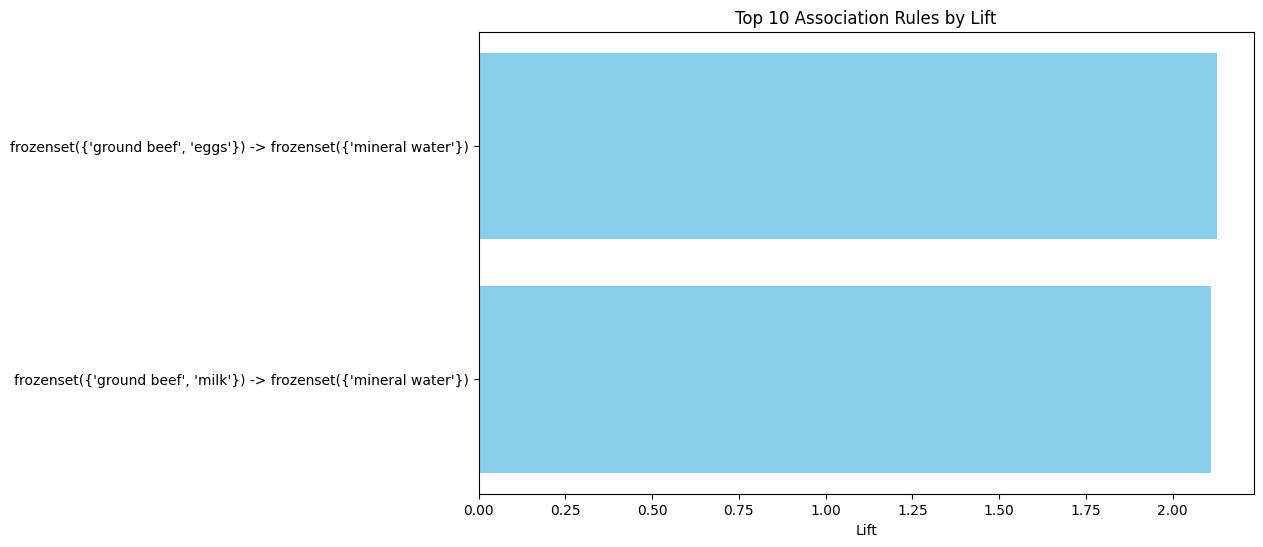

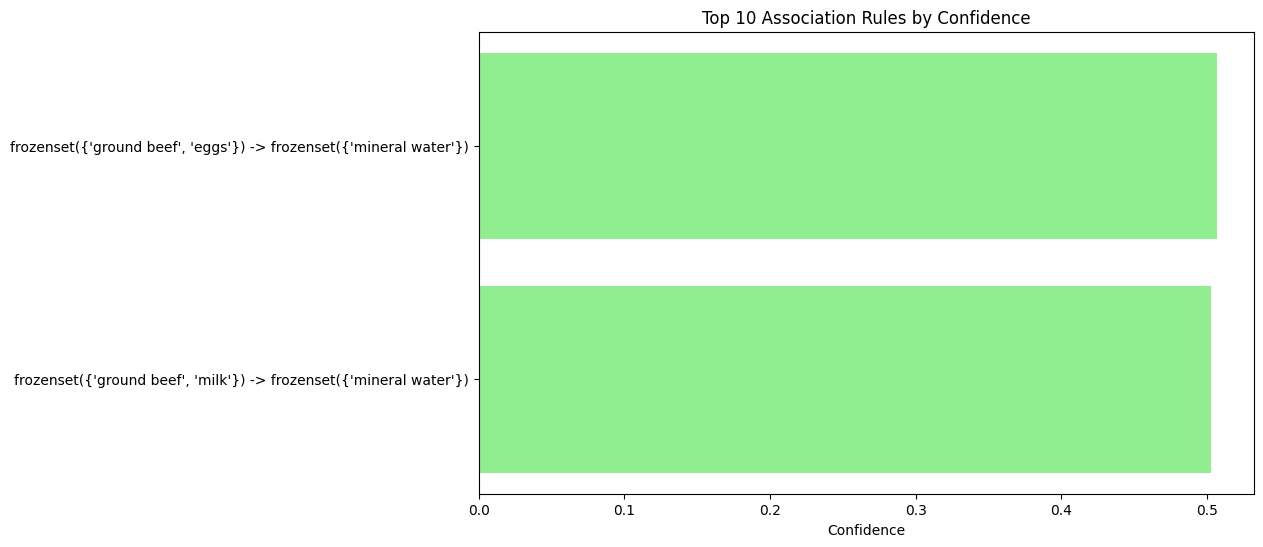

In [23]:
# Visualize the Top 10 Rules by Lift
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_lift_rules)), top_lift_rules['lift'], color='skyblue')
plt.yticks(range(len(top_lift_rules)), [str(a) + ' -> ' + str(c) for a, c in zip(top_lift_rules['antecedents'], top_lift_rules['consequents'])])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

# Visualize the Top 10 Rules by Confidence
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_confidence_rules)), top_confidence_rules['confidence'], color='lightgreen')
plt.yticks(range(len(top_confidence_rules)), [str(a) + ' -> ' + str(c) for a, c in zip(top_confidence_rules['antecedents'], top_confidence_rules['consequents'])])
plt.xlabel('Confidence')
plt.title('Top 10 Association Rules by Confidence')
plt.gca().invert_yaxis()
plt.show()

# **What is Lift and why is it important?**

**Lift**

Measures how much more likely the consequent is purchased when the antecedent is purchased compared to random chance.

**Formula**

Lift = Confidence / Support(Y)


**Interpretation**



*   Lift > 1: Positive association (strong rule).

*   Lift = 1: No association.
*   Lift < 1: Negative association.

**Importance**

Lift tells you whether a rule is actually meaningful or just occurring by chance.
It removes misleading rules with high confidence but weak real association.







# **What is Support & Confidence? How do you calculate them?**

**Support**

Fraction of total transactions that contain the itemset.

Support(A → B) = (Transactions containing A & B) / (Total transactions)


**Confidence**

How often B is purchased when A is purchased

Confidence(A → B) = Support(A & B) / Support(A)


# **What are some limitations or challenges of Association Rule Mining?**


**1. High computational cost**

Large datasets generate millions of itemsets → slow.

**2. Too many rules**

Algorithm may generate thousands of meaningless rules.

**3. Sparse data**

if most transactions have very few items, rules become weak.

**4. Requires proper thresholds**

Setting support too high → missing interesting rules

Setting support too low → too many rules, slow computation

**5. Only finds correlations**

Association rules show relationships, not causation.